In [9]:
import numpy as np
import nltk
import scipy.stats as ss
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS
import re
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

In [10]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [11]:
def remove_symbols(line):
    return re.sub('[^A-Za-z0-9\s]+', '', line).lower()

In [12]:
from nltk.corpus import gutenberg
gutenberg.fileids()
['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', ...]
alice = gutenberg.words('carroll-alice.txt')
# https://www.nltk.org/book/ch02.html
alice

['[', 'Alice', "'", 's', 'Adventures', 'in', ...]

In [53]:
all_words = list(map(str.lower, alice)) # lowering words
words = set(all_words) # listing unique words
counts = [(w , all_words.count(w)) for w in words] # just a tuple of words and its counts

In [46]:
counts[:50]

[('takes', 2),
 ('sounds', 4),
 ('sun', 2),
 ('faint', 1),
 ('learnt', 2),
 ('raised', 2),
 ('singers', 2),
 ('beauti', 1),
 ('whistle', 1),
 ('closed', 2),
 ('serpents', 3),
 ('snappishly', 1),
 ('judging', 1),
 ('guard', 1),
 ('fancied', 2),
 ('bringing', 3),
 ('shorter', 2),
 ('tiptoe', 2),
 ('dreamy', 1),
 ('his', 96),
 ('settled', 3),
 ('cart', 1),
 ('rush', 2),
 ('heels', 1),
 ('ought', 14),
 ('warning', 1),
 ('classics', 1),
 ('just', 52),
 ('tut', 2),
 ('downwards', 1),
 ('field', 1),
 ('fur', 3),
 ('hatter', 56),
 ('morning', 5),
 ('hear', 14),
 ('ve', 44),
 ('guests', 3),
 ('boldly', 1),
 ('gently', 3),
 ('kills', 1),
 (',"', 4),
 ('seaography', 1),
 ('quadrille', 4),
 ('eaglet', 3),
 ('lark', 1),
 ('graceful', 1),
 ('grey', 1),
 ('listened', 1),
 ('ever', 21),
 ('cannot', 1)]

In [26]:
# managing frequency dictionary too for wordcloud
freq_dict = {}
for w, c in counts:
  freq_dict[w] = c
# freq_dict

In [30]:
"""
rank can also be evaluated by sorting above list as well and using indexes,
however that will be totally linear and will have unique rank for each(even if same counts)
"""
count_rank = ss.rankdata([c for (w, c) in counts]) 
counts_ranked = [(c[0], c[1], w) for c, w in zip(counts, count_rank)] # merging in all 3 lists
print(counts_ranked[0:50])
counts_sorted = sorted(counts_ranked, key=lambda _: _[2]) # sorting by rank

counts_sorted[-10:]

[('takes', 2, 1334.0), ('sounds', 4, 1845.5), ('sun', 2, 1334.0), ('faint', 1, 567.0), ('learnt', 2, 1334.0), ('raised', 2, 1334.0), ('singers', 2, 1334.0), ('beauti', 1, 567.0), ('whistle', 1, 567.0), ('closed', 2, 1334.0), ('serpents', 3, 1652.0), ('snappishly', 1, 567.0), ('judging', 1, 567.0), ('guard', 1, 567.0), ('fancied', 2, 1334.0), ('bringing', 3, 1652.0), ('shorter', 2, 1334.0), ('tiptoe', 2, 1334.0), ('dreamy', 1, 567.0), ('his', 96, 2583.5), ('settled', 3, 1652.0), ('cart', 1, 567.0), ('rush', 2, 1334.0), ('heels', 1, 567.0), ('ought', 14, 2349.0), ('warning', 1, 567.0), ('classics', 1, 567.0), ('just', 52, 2533.5), ('tut', 2, 1334.0), ('downwards', 1, 567.0), ('field', 1, 567.0), ('fur', 3, 1652.0), ('hatter', 56, 2540.0), ('morning', 5, 1968.0), ('hear', 14, 2349.0), ('ve', 44, 2509.0), ('guests', 3, 1652.0), ('boldly', 1, 567.0), ('gently', 3, 1652.0), ('kills', 1, 567.0), (',"', 4, 1845.5), ('seaography', 1, 567.0), ('quadrille', 4, 1845.5), ('eaglet', 3, 1652.0), ('la

[('i', 543, 2627.0),
 ('she', 553, 2628.0),
 ('it', 595, 2629.0),
 ('a', 632, 2630.0),
 ('to', 729, 2631.0),
 ('.', 764, 2632.0),
 ('and', 872, 2633.0),
 ('the', 1642, 2634.0),
 ("'", 1731, 2635.0),
 (',', 1993, 2636.0)]

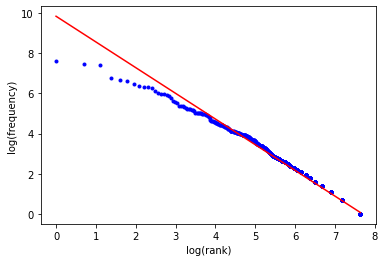

Text(0, 0.5, 'frequency')

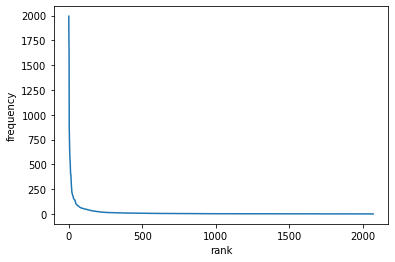

In [31]:
L = len(counts_sorted)
X = np.array([np.log(L-r+1) for (w, c, r) in counts_sorted])
Y = np.array([np.log(c) for (w, c, r) in counts_sorted])
plt.plot(X, Y, 'b.')
A = np.vstack([X, np.ones(L)]).T
m, c = np.linalg.lstsq(A, Y, rcond=None)[0]
plt.plot(X, m*X + c, 'r')
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
plt.show()
plt.plot([L-r+1 for (_, __, r) in counts_sorted], [c for (_, c, __) in counts_sorted])
plt.xlabel('rank')
plt.ylabel('frequency')

# log freq = log c -alpha log(r)
# y = c + mx

[(0, ('faint', 1)),
 (1, ('beauti', 1)),
 (2, ('whistle', 1)),
 (3, ('snappishly', 1)),
 (4, ('judging', 1)),
 (5, ('guard', 1)),
 (6, ('dreamy', 1)),
 (7, ('cart', 1)),
 (8, ('heels', 1)),
 (9, ('warning', 1)),
 (10, ('classics', 1)),
 (11, ('downwards', 1)),
 (12, ('field', 1)),
 (13, ('boldly', 1)),
 (14, ('kills', 1)),
 (15, ('seaography', 1)),
 (16, ('lark', 1)),
 (17, ('graceful', 1)),
 (18, ('grey', 1)),
 (19, ('listened', 1)),
 (20, ('cannot', 1)),
 (21, ('frying', 1)),
 (22, ('prosecute', 1)),
 (23, ('herald', 1)),
 (24, ('retire', 1)),
 (25, ('pence', 1)),
 (26, ('injure', 1)),
 (27, ('consented', 1)),
 (28, ('labelled', 1)),
 (29, ('stool', 1)),
 (30, ('killing', 1)),
 (31, ('dunce', 1)),
 (32, ('wits', 1)),
 (33, ('visit', 1)),
 (34, ('signify', 1)),
 (35, ('chimneys', 1)),
 (36, ('flapper', 1)),
 (37, ('agony', 1)),
 (38, ('pet', 1)),
 (39, ('fighting', 1)),
 (40, ('daisy', 1)),
 (41, ('stopping', 1)),
 (42, ('disgust', 1)),
 (43, ('appealed', 1)),
 (44, ('memorandum', 1))

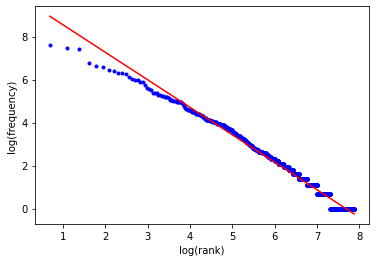

In [39]:
counts_sorted_ = sorted(counts, key=lambda _:_[1])
counts_with_rank = list(enumerate(counts_sorted_))
# plt.plot()
# print(counts_with_rank[:10])
L_ = len(counts_sorted_)
X_ = np.array([np.log(L-r+1) for (r, (w, c)) in counts_with_rank])
Y_ = np.array([np.log(c) for (r, (w, c)) in counts_with_rank])
plt.plot(X_, Y_, 'b.')
A_ = np.vstack([X_, np.ones(L_)]).T
m_, c_ = np.linalg.lstsq(A_, Y_, rcond=None)[0]
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
plt.plot(X_, m_*X_ + c_, 'r')
# np.shape(A_), np.shape(Y_)
counts_with_rank[:50]

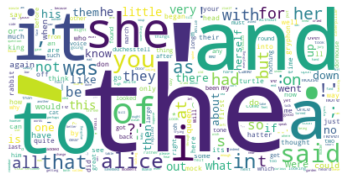

In [33]:
wc = WordCloud(background_color="white", max_words=1000)
# generate word cloud
wc.generate_from_frequencies(freq_dict)
# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
# hence we're basically printing stopwords

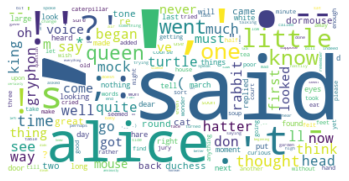

In [34]:
stopwords = set(STOPWORDS)
freq_dict_ = {}
for w, c in counts:
  if w not in stopwords:
    freq_dict_[w] = c

wc = WordCloud(background_color="white")
# generate word cloud
wc.generate_from_frequencies(freq_dict_)
# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

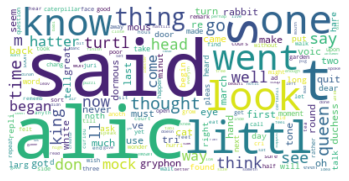

In [35]:
stopwords = set(STOPWORDS)
freq_dict_ = {}
for w, c in counts:
  if w not in stopwords:
    w = remove_symbols(w)
    if w:
      # print(w, porter.stem(w))
      w = porter.stem(w)
      freq_dict_[w] = freq_dict_.get(w, 0) + c

wc = WordCloud(background_color="white")
# generate word cloud
wc.generate_from_frequencies(freq_dict_)
# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


In [36]:
# Just for checking for the stemming part 

a = ['alice', 'said', 'little', 'done']
# [print(porter.stem(i)) ]
for i in a:
  w = porter.stem(i)
  print(w)

alic
said
littl
done
